# Figure 6 a, b

In [ ]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/ ssGSEA/外部/TCGA_estimate.rdata")
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig5/estimate/TCGA/estimate_risk.rdata")

In [5]:
ls()

[1] "annotation_col_"         "annotation_col_F5C_TCGA"
 [3] "cox_gene"                "entire"                 
 [5] "entire_risk"             "iMigor210_exp_pd"       
 [7] "iMigor210_risk"          "TCGA_exp_pd"            
 [9] "TCGA_exp_pd_"            "TCGA_risk"              
[11] "test_risk"               "train_pd_exp"           
[13] "train_risk"              "tset_pd_exp"

In [6]:
library(tidyr)
library(RColorBrewer)
library(ggplot2)
library(ggpubr)

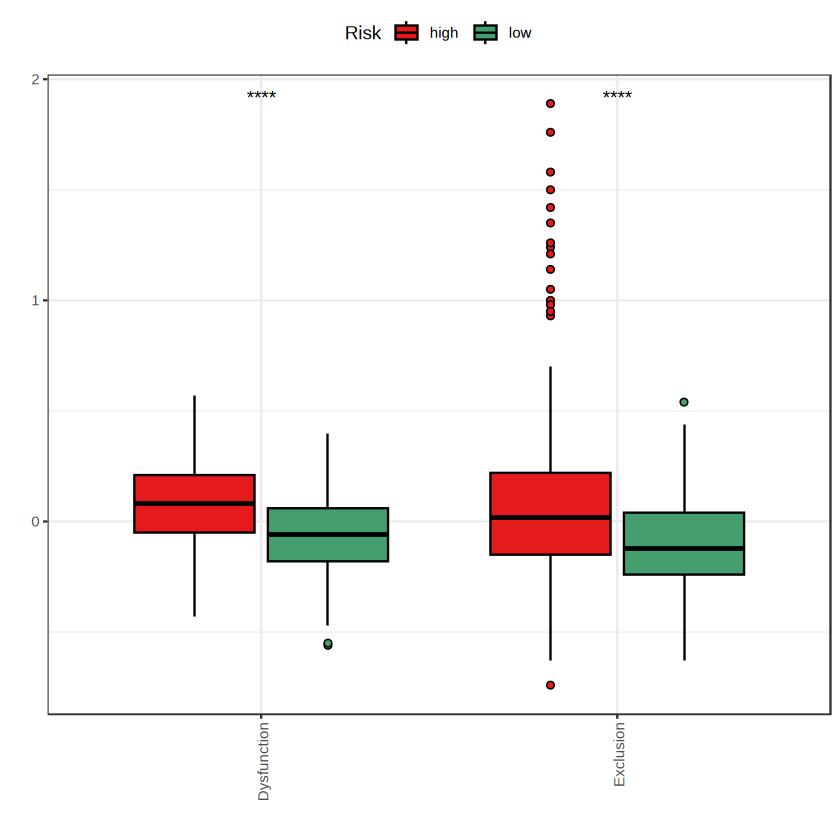

In [7]:
Expr <- t(apply(entire[,-c(17662:17668)], 2, function(x)x-(mean(x))))
Expr_ <- t(apply(TCGA_exp_pd[,-c(1:10)] ,2, function(x)x-(mean(x))))
write.table(Expr,"entire.txt",sep = "\t")
write.table(Expr_,"TCGA.txt",sep = "\t")

x = TCGA_risk[,c(1,2,17673)]
x  = x[order(x$risk),]
TCGA_TIDE = read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig6/TIED/TCGA_TIDE.csv",row.names = 1)[c(10,11)][rownames(annotation_col_F5C_TCGA),]

TCGA_TIDE$Risk = annotation_col_F5C_TCGA$Risk
TCGA_TIDE = gather(TCGA_TIDE,set,value,-Risk)
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
g3 = ggplot(TCGA_TIDE,aes(set,value,fill = Risk)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  theme_bw() + 
  labs(x = "", y = "") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=90,vjust = 0.7, hjust = 1))+
  scale_fill_manual(values = mypalette(22)[c(1,6)])+ 
  stat_compare_means(aes(group = Risk,label = ..p.signif..),method = "wilcox.test")
g3
ggsave("TIED.pdf",g3,width = 5,height =5)
save(TCGA_TIDE,file = "TCGA_TIDE.rdata")

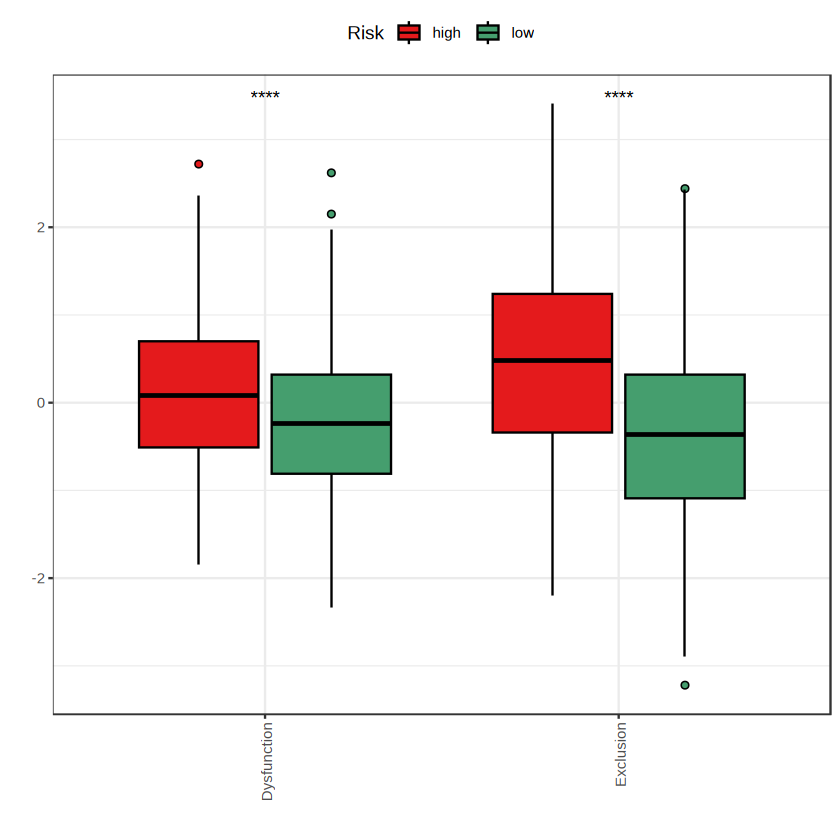

In [8]:
entire_TIDE = read.csv("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig6/TIED/entire__tide.csv",row.names = 1)[c(10,11)][rownames(annotation_col_),]

entire_TIDE$Risk = annotation_col_$Risk
entire_TIDE = gather(entire_TIDE,set,value,-Risk)
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
g3 = ggplot(entire_TIDE,aes(set,value,fill = Risk)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  theme_bw() + 
  labs(x = "", y = "") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=90,vjust = 0.7, hjust = 1))+
  scale_fill_manual(values = mypalette(22)[c(1,6)])+ 
  stat_compare_means(aes(group = Risk,label = ..p.signif..),method = "wilcox.test")
g3
ggsave("entire_TIDE.pdf",g3,width = 5,height =5)
save(entire_TIDE,file = "entire_TIDE.rdata")

# Figure 6 c, d

In [9]:
library(IOBR)
library(ggplot2)
library(RColorBrewer)
library(ggpubr)
library(cowplot)
library(purrr)

Warning message:
“multiple methods tables found for ‘union’”
Warning message:
“multiple methods tables found for ‘intersect’”
Warning message:
“multiple methods tables found for ‘setdiff’”
Warning message:
“multiple methods tables found for ‘setequal’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘GenomicRanges’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘IRanges’”
Warning message:
“multiple methods tables found for ‘union’”
Warning message:
“multiple methods tables found for ‘intersect’”
Warning message:
“multiple methods tables found for ‘setdiff’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘GenomeInfoDb’”
Warning message:
“multiple methods tables found for ‘intersect’”
Warning message:
“replacing previous import ‘BiocGenerics::setequal’ by ‘S4Vectors::setequal’ when loading ‘XVector’”
Warning me

In [10]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")

In [11]:
data(ips_gene_set)
data(common_genes)
data(SI_geneset)

In [12]:
#==============================
# Step 1: Prepare expression matrices and risk groups
#==============================

fpkm_entire <- t(entire_risk[,1:17661])
fpkm_tcga <- t(TCGA_risk[,11:17671])

group_entire <- data.frame(ID = rownames(entire_risk),
                           risk = entire_risk$risk)
group_tcga <- data.frame(ID = rownames(TCGA_risk),
                         risk = TCGA_risk$risk)

#==============================
# Step 2: IPS analysis
#==============================

ips_entire <- deconvo_tme(eset = fpkm_entire, method = "ips", plot = FALSE)
ips_tcga   <- deconvo_tme(eset = fpkm_tcga, method = "ips", plot = FALSE)

#==============================
# Step 3: Merge with risk groups
#==============================

ips_entire_df <- merge(group_entire, ips_entire, by = "ID")
ips_tcga_df   <- merge(group_tcga, ips_tcga, by = "ID")

#==============================
# Step 4: Set plotting parameters
#==============================

mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
my_comparisons <- list(c("high","low"))

#==============================
# Step 5: Generate boxplots for MHC/CP/AZ
#==============================

pp_entire <- map(c("MHC_IPS","CP_IPS","AZ_IPS"), function(colname){
  ggplot(ips_entire_df, aes(x = risk, y = .data[[colname]], fill = risk)) +
    geom_boxplot(outlier.shape = 21, color = "black") +
    theme_bw() +
    labs(x = "", y = colname) +
    theme(legend.position = "top",
          axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5)) +
    scale_fill_manual(values = mypalette(22)[c(1,6)]) +
    stat_compare_means(comparisons = my_comparisons) +
    theme(text = element_text(size=20))
})

pp_tcga <- map(c("MHC_IPS","CP_IPS","AZ_IPS"), function(colname){
  ggplot(ips_tcga_df, aes(x = risk, y = .data[[colname]], fill = risk)) +
    geom_boxplot(outlier.shape = 21, color = "black") +
    theme_bw() +
    labs(x = "", y = colname) +
    theme(legend.position = "top",
          axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5)) +
    scale_fill_manual(values = mypalette(22)[c(1,6)]) +
    stat_compare_means(comparisons = my_comparisons) +
    theme(text = element_text(size=20))
})

#==============================
# Step 6: Generate IPS violin plots
#==============================

g_violin_entire <- ggplot(ips_entire_df, aes(x = risk, y = IPS_IPS, fill = risk)) +
  geom_violin(color = "black") +
  geom_boxplot(outlier.shape = 21, fill = "white", width = 0.05) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "black") +
  theme_bw() +
  labs(x = "", y = "IPS") +
  theme(legend.position = "top",
        axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5)) +
  scale_fill_manual(values = mypalette(22)[c(1,6)]) +
  stat_compare_means(comparisons = my_comparisons) +
  theme(text = element_text(size=20))

g_violin_tcga <- ggplot(ips_tcga_df, aes(x = risk, y = IPS_IPS, fill = risk)) +
  geom_violin(color = "black") +
  geom_boxplot(outlier.shape = 21, fill = "white", width = 0.05) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "black") +
  theme_bw() +
  labs(x = "", y = "IPS") +
  theme(legend.position = "top",
        axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5)) +
  scale_fill_manual(values = mypalette(22)[c(1,6)]) +
  stat_compare_means(comparisons = my_comparisons) +
  theme(text = element_text(size=20))

#==============================
# Step 7: Combine all plots into a single row (boxplots + violin plot)
#==============================

# Entire dataset
p_entire <- cowplot::plot_grid(
  pp_entire[[1]], pp_entire[[2]], pp_entire[[3]], g_violin_entire,
  nrow = 1, align = "h", labels = c("MHC", "CP", "AZ", "IPS")
)

# TCGA dataset
p_tcga <- cowplot::plot_grid(
  pp_tcga[[1]], pp_tcga[[2]], pp_tcga[[3]], g_violin_tcga,
  nrow = 1, align = "h", labels = c("MHC", "CP", "AZ", "IPS")
)

#==============================
# Step 8: Save the plots as PDF
#==============================

pdf("IPS_FullPlot_Entire.pdf", width = 18, height = 5)
p_entire
dev.off()

pdf("IPS_FullPlot_TCGA.pdf", width = 18, height = 5)
p_tcga
dev.off()



>>> Running Immunophenoscore


>>> Running Immunophenoscore



agg_record_1861263838 
                    2

agg_record_1861263838 
                    2

# Figure 6 e

In [13]:
library(tidyr)
library(purrr)
library(RColorBrewer)
library(ggpubr)
library(cowplot)
library(data.table)
library(pRRophetic)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


Warning message:
“replacing previous import ‘car::Anova’ by ‘genefilter::Anova’ when loading ‘pRRophetic’”


In [14]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")

In [15]:
entireMatrix = as.matrix(t(entire_risk[,1:17661]))
predictedPtype <- pRRopheticPredict(testMatrix=entireMatrix, 
                                    drug="Cisplatin",
                                    tissueType = "allSolidTumors", 
                                    batchCorrect = "eb",
                                    selection=1,
                                    dataset = "cgp2014")

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done



[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done

[1] "Check passed!"

 10945  gene identifiers overlap between the supplied expression matrices... 
 


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data





 2189 low variabilty genes filtered.
Fitting Ridge Regression model... Done

Calculating predicted phenotype...Done



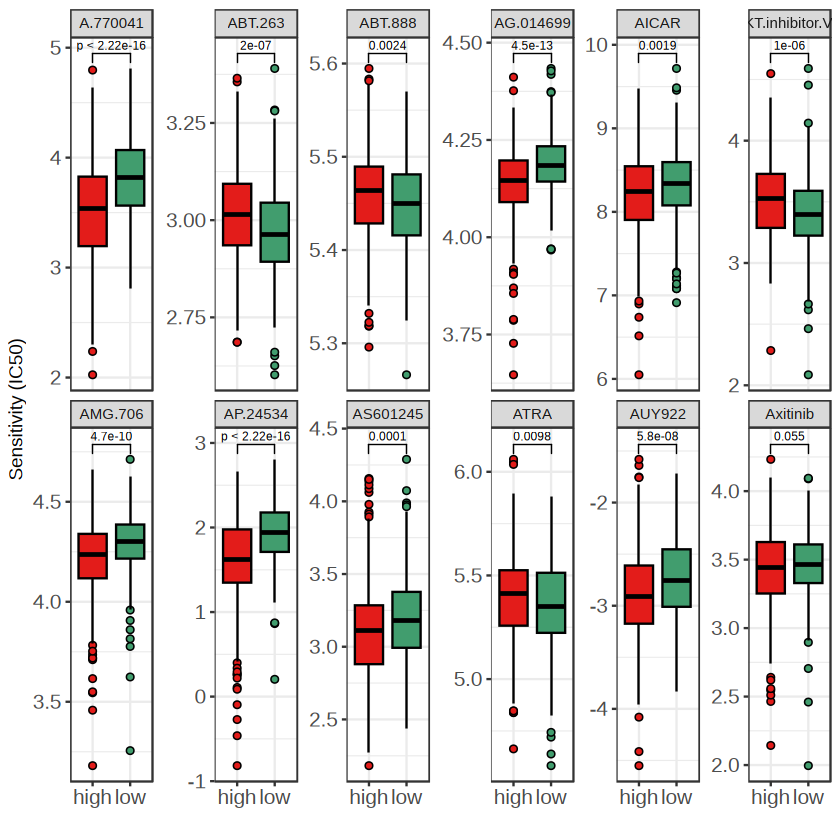

In [16]:
# Create a data frame with sample names
df <- data.frame(names = rownames(entire_risk), row.names = rownames(entire_risk))

# List of drugs to predict
drugs <- c('A.770041','ABT.263','ABT.888','AG.014699','AICAR',
           'AKT.inhibitor.VIII','AMG.706','AP.24534','AS601245',
           'ATRA','AUY922','Axitinib')

# Initialize column index
j <- 2

# Loop over each drug to predict IC50 using pRRophetic
for (i in drugs) {
  predictedPtype <- pRRopheticPredict(
    testMatrix = entireMatrix,       # Expression matrix
    drug = i,                      # Drug name
    tissueType = "allSolidTumors", # Tissue type
    batchCorrect = "eb",           # Batch effect correction
    selection = 1,                 # Handle duplicate genes
    dataset = "cgp2014"            # Training dataset (ensure available in your environment)
  )
  
  # Store predicted IC50 in the data frame
  df[, j] <- predictedPtype
  colnames(df)[j] <- i
  j <- j + 1
}

# Create a risk group data frame
risk_group <- data.frame(names = rownames(entire_risk),
                         risk = entire_risk$risk)

# Merge predicted IC50 with risk information
drugs_risk <- merge(risk_group, df, by = "names")

# Prepare data in long format for ggplot
selected_drugs <- colnames(df)[-1]  # Exclude 'names' column
plot_long <- drugs_risk %>%
  pivot_longer(cols = all_of(selected_drugs),
               names_to = "drug",
               values_to = "IC50")

# Define custom colors for risk groups
mypalette <- c("high" = "#E31C1A", "low" = "#419D6E")

# Create boxplot of drug sensitivity by risk group
pp <- ggplot(plot_long, aes(x = risk, y = IC50, fill = risk)) +
  geom_boxplot(outlier.shape = 21, color = "black") +
  facet_wrap(~drug, scales = "free_y", ncol = 6) +
  scale_fill_manual(values = mypalette) +
  stat_compare_means(comparisons = list(c("high", "low")), size = 2.5) +
  theme_bw() +
  labs(x = "", y = "Sensitivity (IC50)") +
  theme(
    legend.position = "top",
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    plot.title = element_text(hjust = 0.5, size = 14)
  ) +
  guides(fill = "none")

# Display the plot
pp

# Save plot as PDF
ggsave("Sensitivity.pdf", pp, width = 16, height = 7)


# Figure 6 f, g


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


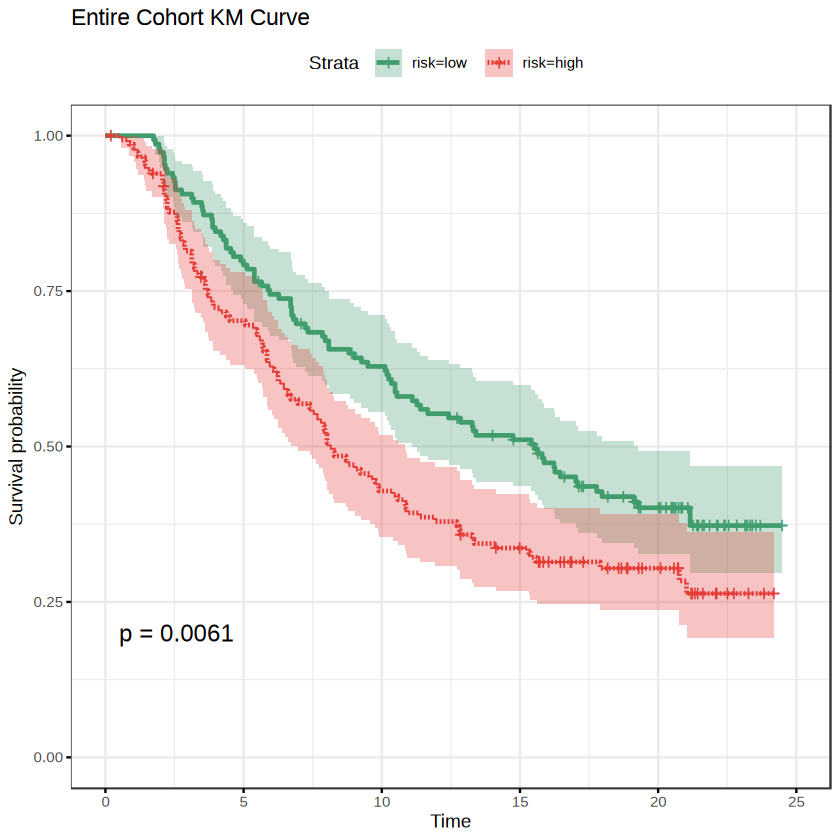

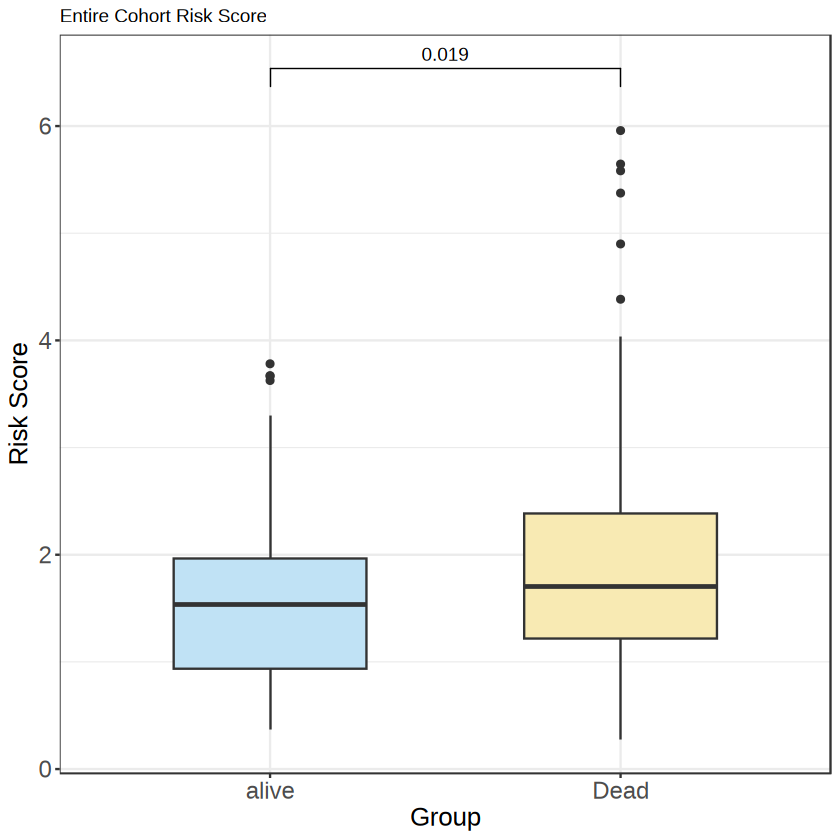

In [17]:
library(survival)
library(survminer)
library(ggplot2)
library(ggpubr)

load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")
## ============
## Entire cohort
## ============
iMigor210_risk$risk <- factor(iMigor210_risk$risk, levels = c("low", "high"))
fit_entire <- survfit(Surv(OS_time, Status) ~ risk, data = iMigor210_risk)

print(
  ggsurvplot(
    fit_entire,
    data = iMigor210_risk,
    pval = TRUE, conf.int = TRUE,
    risk.table = FALSE, linetype = "strata",
    ggtheme = theme_bw(),
    palette = c("#419D6E", "#E53B36"),
    title = "Entire Cohort KM Curve"
  )
)

iMigor210_risk$Group <- ifelse(iMigor210_risk$Status == 1, "Dead", "alive")
iMigor210_risk$Group <- factor(iMigor210_risk$Group, levels = c("alive", "Dead"))

print(
  ggplot(iMigor210_risk, aes(x = Group, y = riskScore, fill = Group)) +
    geom_boxplot(width = 0.55, show.legend = FALSE) +
    theme_bw() +
    scale_fill_manual(values = c("#c0e2f5", "#f8eab3")) +
    labs(x = "Group", y = "Risk Score", subtitle = "Entire Cohort Risk Score") +
    stat_compare_means(comparisons = list(c("alive", "Dead")),
                       label.y = max(iMigor210_risk$riskScore) * 1.05) +
    theme(axis.text = element_text(size = 14),
          axis.title = element_text(size = 15))
)

# Figure 6 h-o

In [18]:
library(pheatmap)
library(glmnet)  
library(survival)
library(limma)
library(survminer)
library(timeROC)
library(ROCR)
library(caret)
library(rms)
library(regplot)
library(tidyverse)
library(IMvigor210CoreBiologies)
library(SummarizedExperiment)
library(DESeq)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10

Loading required package: lattice

Registered S3 method overwritten by 'pROC':
  method   from            
  plot.roc spatstat.explore


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift


Loading required package: Hmisc


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()        masks data.table::between()
✖ Matrix::expand()        masks tidyr::expand()
✖

In [19]:
data(cds)
str(cds)

Formal class 'CountDataSet' [package "DESeq"] with 10 slots
  ..@ fitInfo               :<environment: 0x5580165aa328> 
  ..@ dispTable             : Named chr NA
  .. ..- attr(*, "names")= chr "_all"
  ..@ multivariateConditions: logi TRUE
  ..@ assayData             :<environment: 0x5580165a10b8> 
  ..@ phenoData             :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	25 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:25] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	348 obs. of  25 variables:
  .. .. .. ..$ Best Confirmed Overall Response: Factor w/ 5 levels "CR","PR","SD",..: 5 5 2 5 2 4 4 4 2 4 ...
  .. .. .. ..$ binaryResponse                 : Factor w/ 2 levels "CR/PR","SD/PD": NA NA 1 NA 1 2 2 2 1 2 ...
  .. .. .. ..$ Enrollment IC                  : Factor w/ 3 levels "IC0","IC1","IC2": 2 2 3 2 2 2 1 1 3 1 ...
  .. .. .. ..$ IC Level                       : Factor w/ 3 levels "IC0",

In [20]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")

,entrez_id,length,symbol
,<chr>,<int>,<chr>
1,1,1766,A1BG
10,10,1317,NAT2
100,100,3386,ADA
1000,1000,4504,CDH2
10000,10000,39468,AKT3
100008586,100008586,598,GAGE12F


   Mode   FALSE 
logical   31286 

Row number of original eset: 

>>>>  31286

>>> 99.79% of probe in expression set was annotated

Row number after filtering duplicated gene symbol: 

>>>>  26130



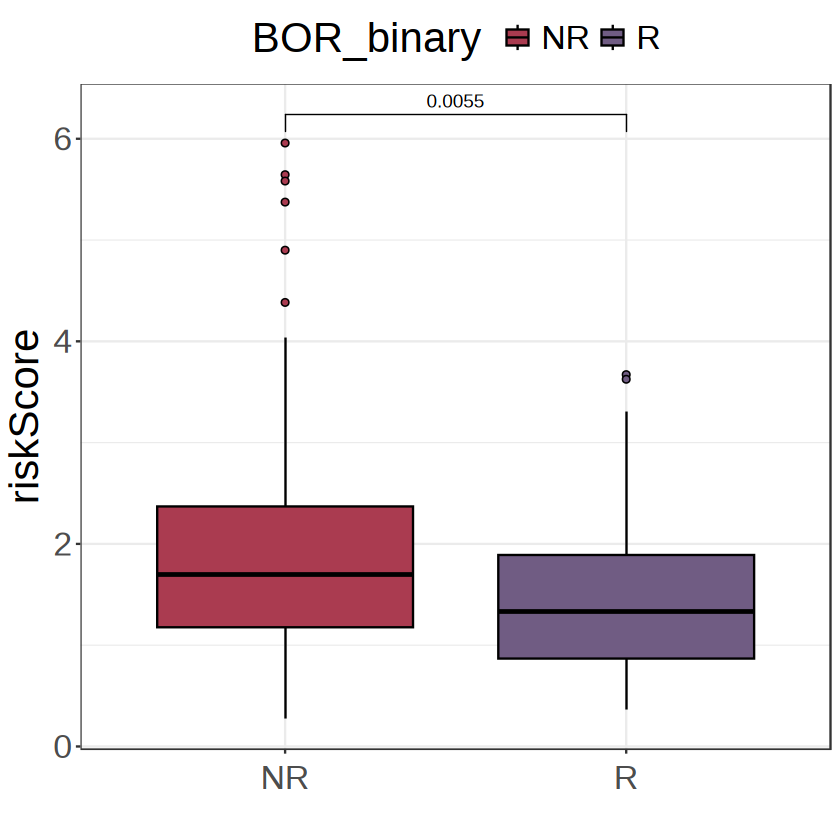

In [21]:
expMatrix <- counts(cds)#提取counts矩阵
eff_length2 <- fData(cds)[,c("entrez_id","length","symbol")]#提取基因信息，待会计算tpm
rownames(eff_length2) <- eff_length2$entrez_id
head(eff_length2)
feature_ids <- rownames(expMatrix)
expMatrix <- expMatrix[feature_ids %in% rownames(eff_length2),]#提取出有长度的基因
mm <- match(rownames(expMatrix),rownames(eff_length2))#匹配
eff_length2 <- eff_length2[mm,]#提取匹配的基因信息

x <- expMatrix/eff_length2$length#消除基因长度
eset <- t(t(x)/colSums(x))*1e6#消除每个样本的深度
summary(duplicated(rownames(eset)))

eset <- IOBR::anno_eset(eset = eset,
                        annotation = eff_length2,
                        symbol = "symbol",
                        probe = "entrez_id",
                        method = "mean")
tumor_type <- "blca"
if(max(eset)>100) eset <- log2(eset+1)

pdata <- pData(cds)
colnames(pdata) <- gsub(colnames(pdata),pattern = " ",replacement = "_")
pdata <- rownames_to_column(pdata[,c("binaryResponse",
                                     "FMOne_mutation_burden_per_MB",
                                     "Neoantigen_burden_per_MB",
                                     "censOS","os")],var = "ID")
colnames(pdata)<-c("ID","BOR_binary","TMB","TNB","status","time")
pdata<-pdata[!is.na(pdata$BOR_binary),]
pdata$BOR_binary<-ifelse(pdata$BOR_binary=="CR/PR","R","NR")
save(expMatrix,pdata,file = "expcli_IMvigor210.Rdata")

eset = t(eset)

pdata$time = as.double(pdata$time );pdata$status = as.double(pdata$status)

eset = eset[intersect(pdata$ID,rownames(eset)),];pdata = pdata[intersect(pdata$ID,rownames(eset)),]

iMigor210_exp_pd = data.frame(pdata,eset)

mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
my_comparisons = list(c("NR","R"))
g3 = ggplot(iMigor210_risk,aes(BOR_binary,riskScore,fill = BOR_binary)) + 
  geom_boxplot(outlier.shape = 21,color = "black") + 
  theme_bw() + 
  labs(x = "", y = "riskScore") +
  theme(legend.position = "top") + 
  theme(axis.text.x = element_text(angle=0,vjust = 0, hjust = 0.5))+
  scale_fill_manual(values = mypalette(22)[c(2,3)])+ 
   stat_compare_means(comparisons = my_comparisons) + # 调整其他文本的字体大小
  theme(text = element_text(size = 25))
g3
ggsave("BOR_binary.pdf",g3,width = 5,height =5 )

Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message:
“ggtheme is not a valid theme.
Please use `theme()` to construct themes.”
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = ma

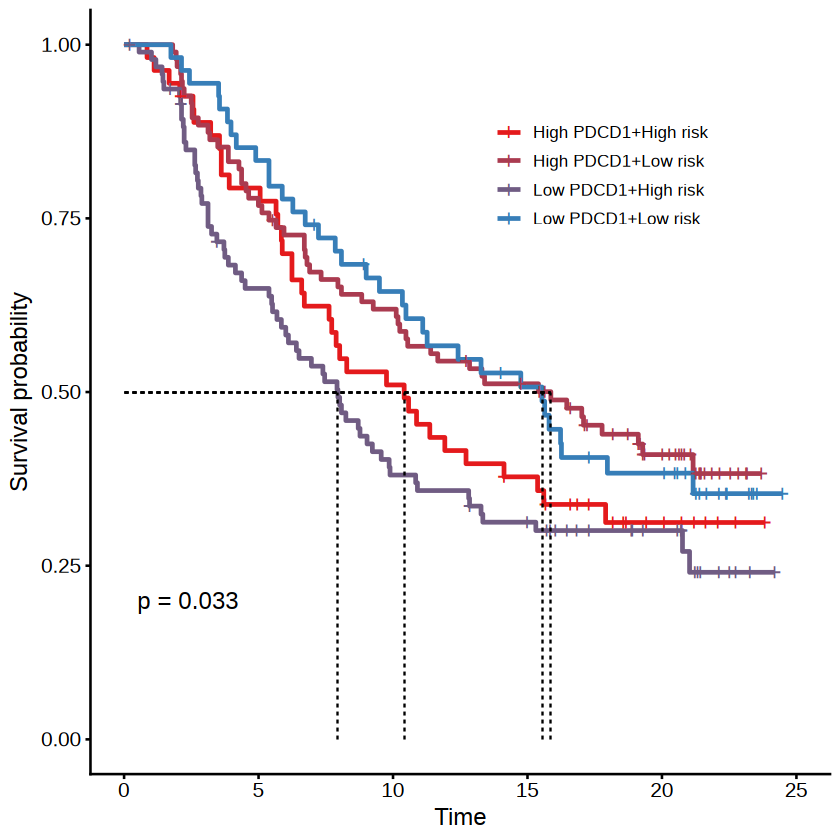

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"


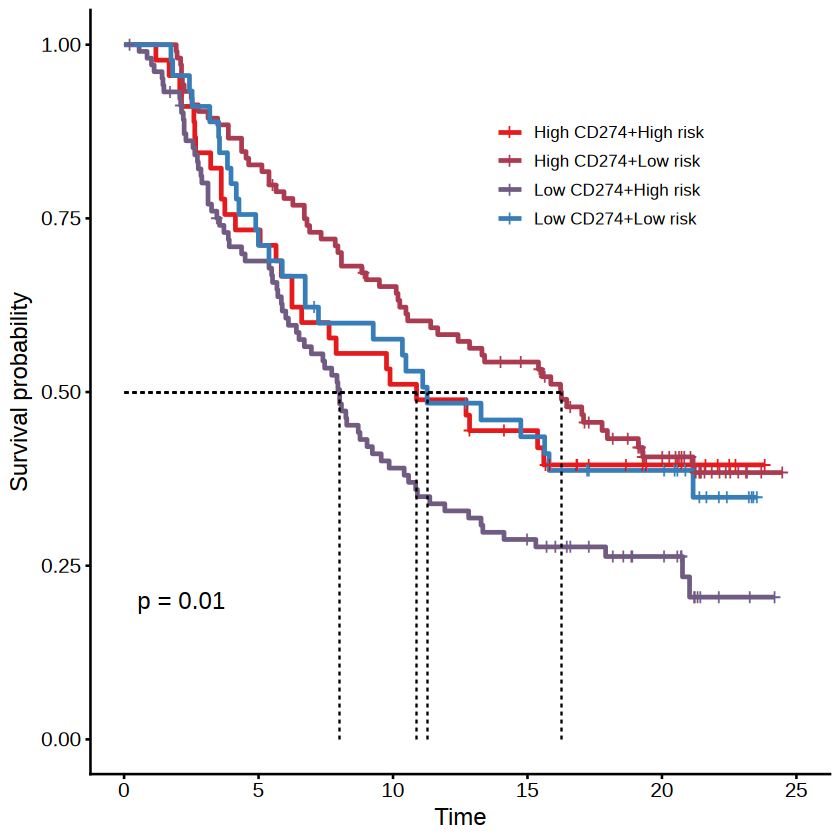

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"


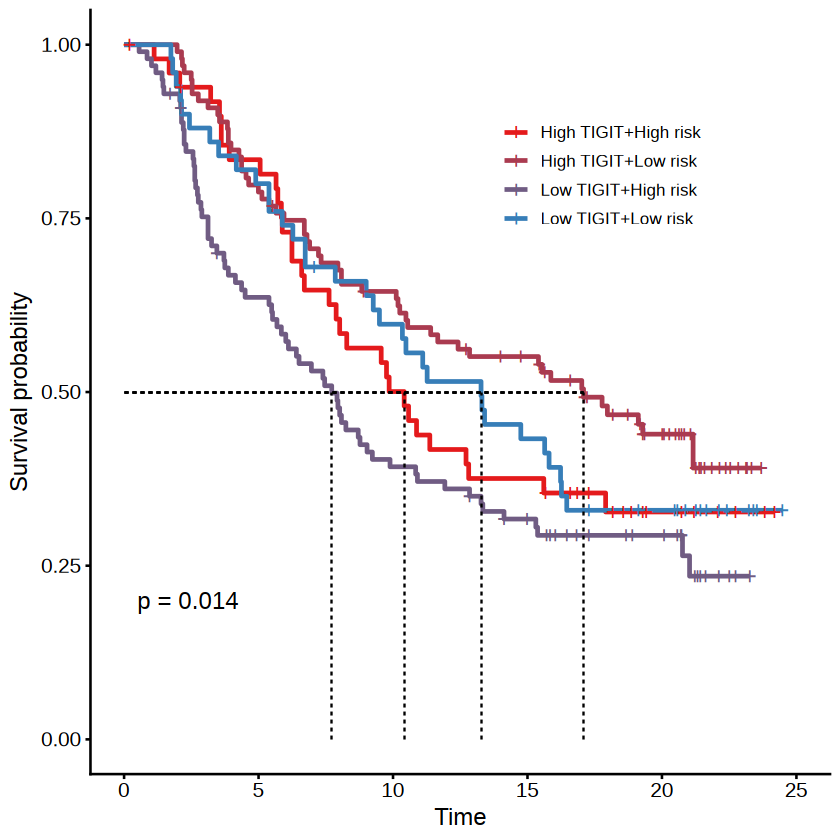

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"


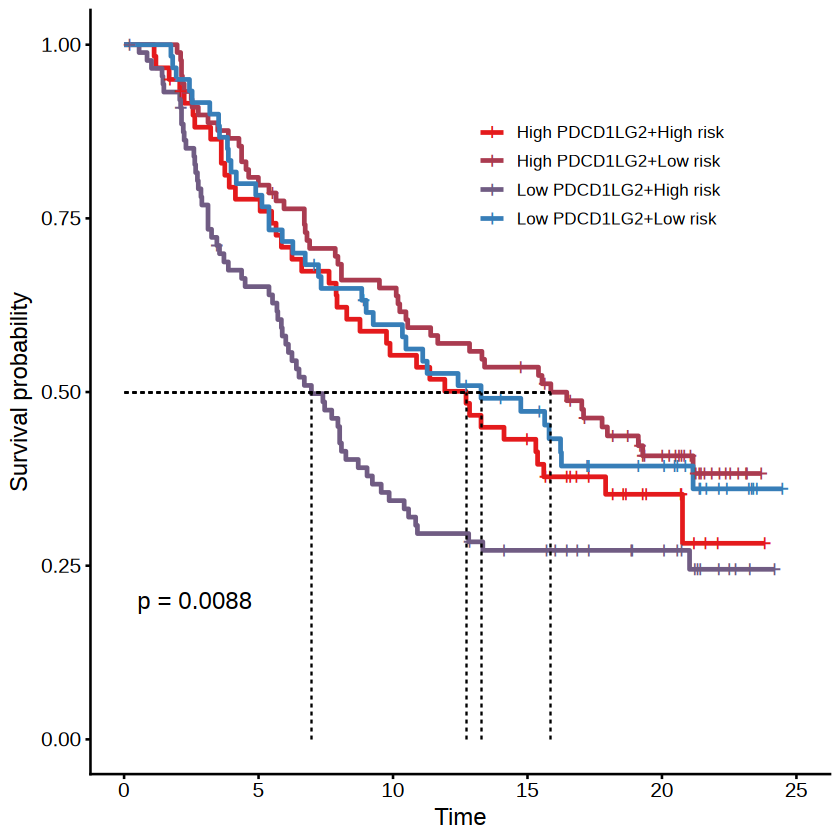

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"


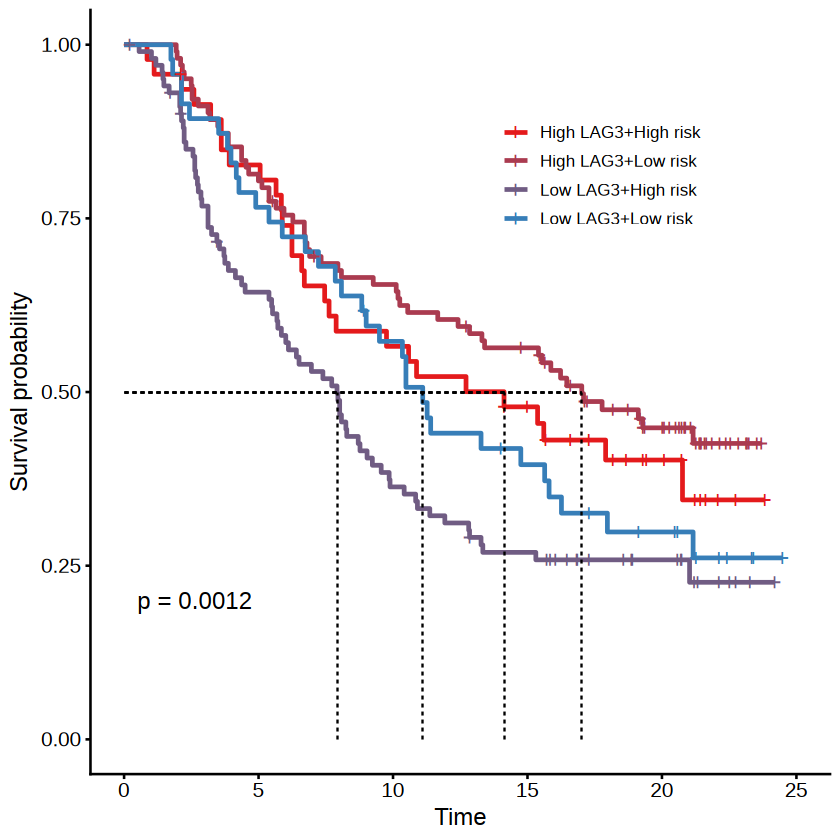

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"


[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]


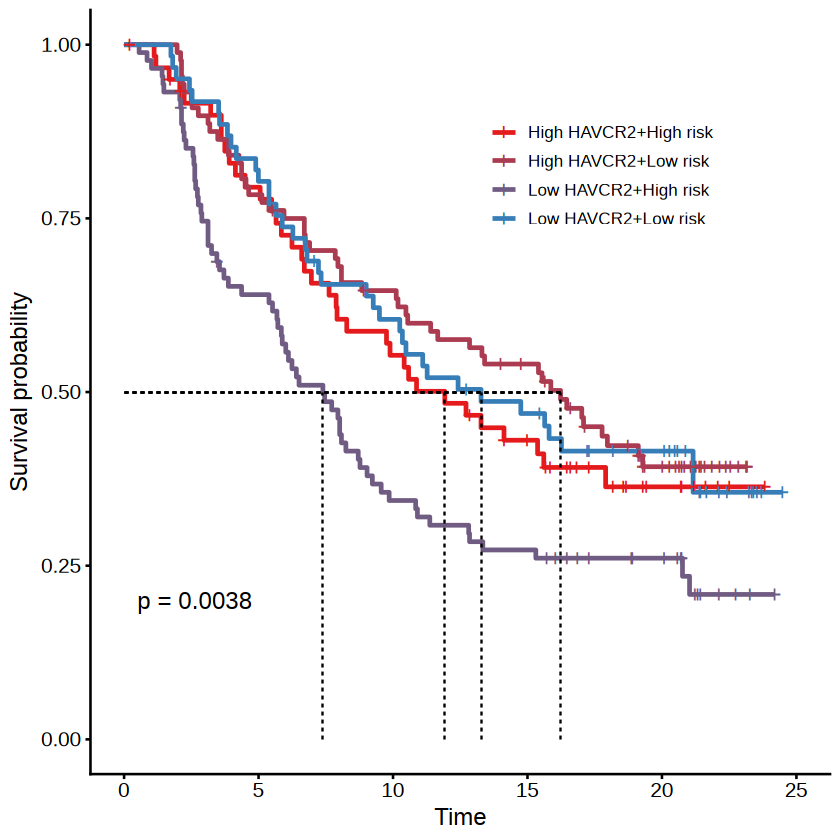

Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics have length 1, but the data has 4 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Ignoring unknown labels:
• fill : ""
• linetype : "1"
Warning message in geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)), :
“All aesthetics

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]


agg_record_1080942386 
                    2

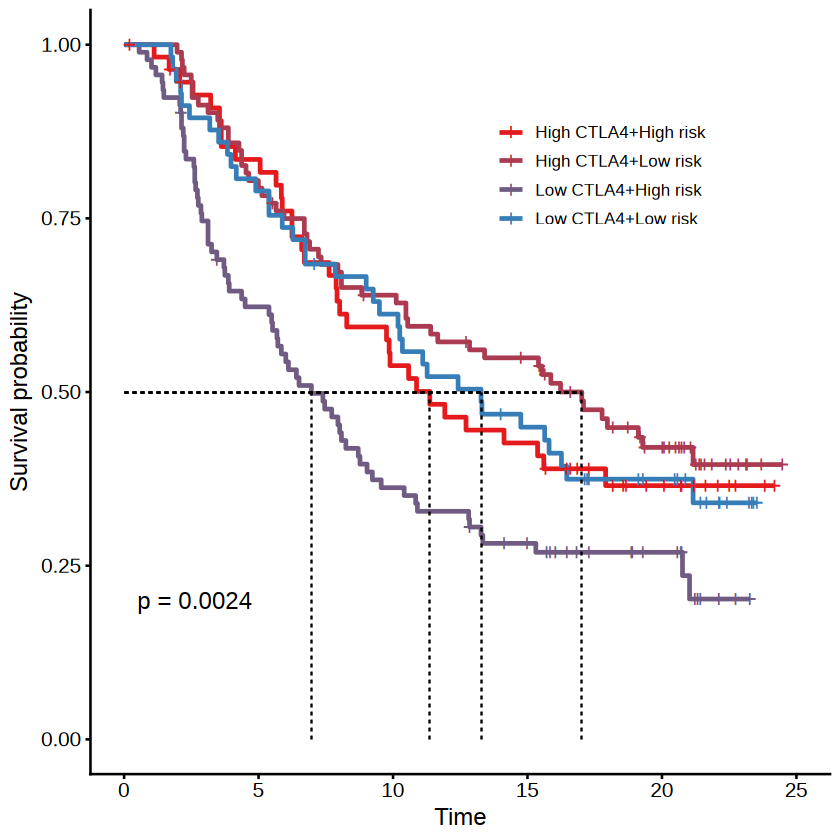

In [22]:
x = ifelse(iMigor210_risk[,"PDCD1"]>median(iMigor210_risk[,"PDCD1"])&
                                  iMigor210_risk$risk == "high","High PDCD1+High risk","low")
iMigor210_risk$PDCD1_risk = ifelse(iMigor210_risk[,"PDCD1"]>median(iMigor210_risk[,"PDCD1"])&
                                  iMigor210_risk$risk == "high","High PDCD1+High risk",ifelse(iMigor210_risk[,"PDCD1"]>median(iMigor210_risk[,"PDCD1"])&
                                  iMigor210_risk$risk == "low","High PDCD1+Low risk",ifelse(iMigor210_risk[,"PDCD1"]<median(iMigor210_risk[,"PDCD1"])&
                                  iMigor210_risk$risk == "high","Low PDCD1+High risk","Low PDCD1+Low risk")))
iMigor210_risk$CD274_risk = ifelse(iMigor210_risk[,"CD274"]>median(iMigor210_risk[,"CD274"])&
                                     iMigor210_risk$risk == "high","High CD274+High risk",ifelse(iMigor210_risk[,"CD274"]>median(iMigor210_risk[,"CD274"])&
                                                                                                   iMigor210_risk$risk == "low","High CD274+Low risk",ifelse(iMigor210_risk[,"CD274"]<median(iMigor210_risk[,"CD274"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low CD274+High risk","Low CD274+Low risk")))
iMigor210_risk$TIGIT_risk = ifelse(iMigor210_risk[,"TIGIT"]>median(iMigor210_risk[,"TIGIT"])&
                                     iMigor210_risk$risk == "high","High TIGIT+High risk",ifelse(iMigor210_risk[,"TIGIT"]>median(iMigor210_risk[,"TIGIT"])&
                                                                                                   iMigor210_risk$risk == "low","High TIGIT+Low risk",ifelse(iMigor210_risk[,"TIGIT"]<median(iMigor210_risk[,"TIGIT"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low TIGIT+High risk","Low TIGIT+Low risk")))
iMigor210_risk$PDCD1LG2_risk = ifelse(iMigor210_risk[,"PDCD1LG2"]>median(iMigor210_risk[,"PDCD1LG2"])&
                                     iMigor210_risk$risk == "high","High PDCD1LG2+High risk",ifelse(iMigor210_risk[,"PDCD1LG2"]>median(iMigor210_risk[,"PDCD1LG2"])&
                                                                                                   iMigor210_risk$risk == "low","High PDCD1LG2+Low risk",ifelse(iMigor210_risk[,"PDCD1LG2"]<median(iMigor210_risk[,"PDCD1LG2"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low PDCD1LG2+High risk","Low PDCD1LG2+Low risk")))
iMigor210_risk$LAG3_risk = ifelse(iMigor210_risk[,"LAG3"]>median(iMigor210_risk[,"LAG3"])&
                                     iMigor210_risk$risk == "high","High LAG3+High risk",ifelse(iMigor210_risk[,"LAG3"]>median(iMigor210_risk[,"LAG3"])&
                                                                                                   iMigor210_risk$risk == "low","High LAG3+Low risk",ifelse(iMigor210_risk[,"LAG3"]<median(iMigor210_risk[,"LAG3"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low LAG3+High risk","Low LAG3+Low risk")))
iMigor210_risk$HAVCR2_risk = ifelse(iMigor210_risk[,"HAVCR2"]>median(iMigor210_risk[,"HAVCR2"])&
                                     iMigor210_risk$risk == "high","High HAVCR2+High risk",ifelse(iMigor210_risk[,"HAVCR2"]>median(iMigor210_risk[,"HAVCR2"])&
                                                                                                   iMigor210_risk$risk == "low","High HAVCR2+Low risk",ifelse(iMigor210_risk[,"HAVCR2"]<median(iMigor210_risk[,"HAVCR2"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low HAVCR2+High risk","Low HAVCR2+Low risk")))
iMigor210_risk$CTLA4_risk = ifelse(iMigor210_risk[,"CTLA4"]>median(iMigor210_risk[,"CTLA4"])&
                                     iMigor210_risk$risk == "high","High CTLA4+High risk",ifelse(iMigor210_risk[,"CTLA4"]>median(iMigor210_risk[,"CTLA4"])&
                                                                                                   iMigor210_risk$risk == "low","High CTLA4+Low risk",ifelse(iMigor210_risk[,"CTLA4"]<median(iMigor210_risk[,"CTLA4"])&
                                                                                                                                                               iMigor210_risk$risk == "high","Low CTLA4+High risk","Low CTLA4+Low risk")))


p =list()
j = 1
for(i in c("PDCD1","CD274","TIGIT","PDCD1LG2","LAG3","HAVCR2","CTLA4")){
fit <- survfit(Surv(OS_time, Status) ~iMigor210_risk[,paste0(i,"_risk")] , data = iMigor210_risk[,c("OS_time","Status",paste0(i,"_risk"))])
g = ggsurvplot(fit,
          pval = TRUE, #conf.int = TRUE,
          #risk.table = TRUE, # 添加风险表
          risk.table.col = "strata", # 根据分层更改风险表颜色
          #linetype = "strata", # 根据分层更改线型
          surv.median.line = "hv", # 同时显示垂直和水平参考线
          #ggtheme = theme_bw(), # 更改ggplot2的主题
          palette =mypalette(22)[c(1:4)],
               legend = c(0.7,0.8),
               legend.title = "",
          legend.labs = names(table(iMigor210_risk[,paste0(i,"_risk")])))#定义颜色
    p[[j]] = g
    j = j+1
}
p
		
pdf("risk.pdf",width = 5,height = 4)
par(mfrow = c(1, 4))
p
dev.off()